Loading the data from the text file

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

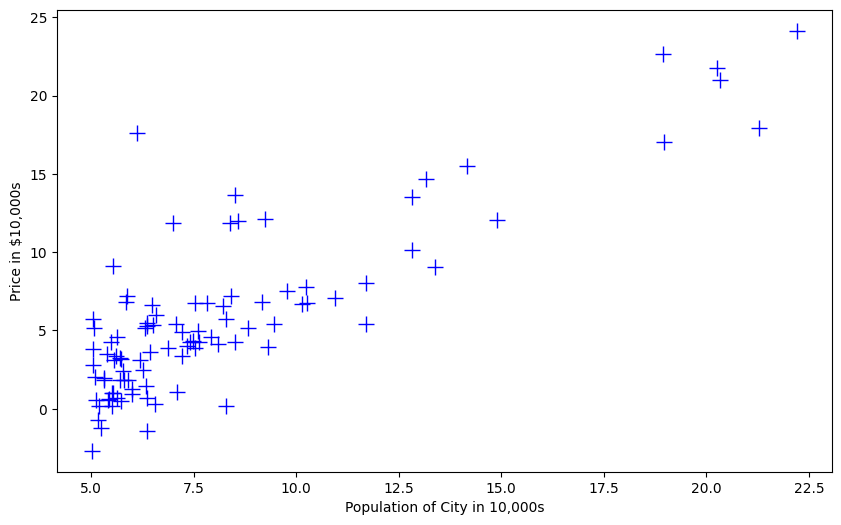

In [1]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab\ Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X_plot = np.insert(X,0,1,axis=1)

#figure
plt.figure(figsize=(10,6))
plt.plot(X[:,0],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

Train test split

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
print(X_train.shape)
print(y_test.shape)
print(X)

(67, 1)
(30, 1)
[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.

In [4]:
# do I even need to do this????? No.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Build the model

In [5]:
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='relu'))

optim = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optim, metrics=['mse'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X, y))

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 35.2300 - mse: 35.2300 - val_loss: 11.7875 - val_mse: 11.7875
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.7829 - mse: 11.7829 - val_loss: 13.0547 - val_mse: 13.0547
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.3287 - mse: 10.3287 - val_loss: 11.7698 - val_mse: 11.7698
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.2932 - mse: 9.2932 - val_loss: 11.6307 - val_mse: 11.6307
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.7660 - mse: 12.7660 - val_loss: 12.5204 - val_mse: 12.5204


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Prediction at 165k: [[11.535942]]


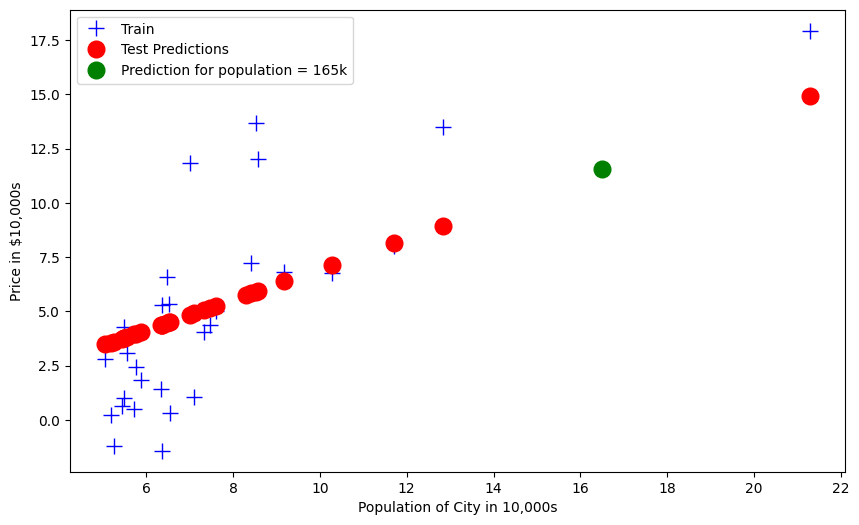

In [7]:
y_pred = model.predict(X_test)
y_pred_165k = model.predict(np.array([[16.5]]))
print('Prediction at 165k:', y_pred_165k)

plt.figure(figsize=(10,6))
plt.plot(X_test[:,0],y_test[:,0],'b+',markersize=12, label='Train')
plt.plot(X_test[:,0],y_pred[:,0],'ro',markersize=12, label='Test Predictions')
plt.plot(16.5,y_pred_165k,'go',markersize=12, label='Prediction for population = 165k')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

plt.legend()
plt.show()




MSE score

In [8]:
test_loss, test_mse = model.evaluate(X_test, y_test)
print('Test MSE:', test_mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11.1184 - mse: 11.1184
Test MSE: 11.118358612060547


Loss plot

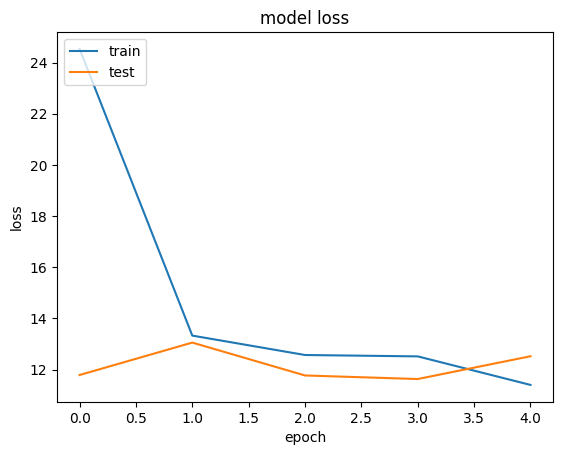

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

The model loss for both the test and training set both appear to converge to a somewhat similar value.  The validation loss converges to slightly below 12, while the training loss converges to slightly above 12.